In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Вариант 3
$y=|x|, a=-3, b=3$

<img src="images/assigment1.jpg" width="700">

### 1. Формируем выборку

$m_x=\frac{a+b}{2}=0, \sigma_x=\sqrt{\frac{(b-a)^2}{12}}=\sqrt{3}$

In [2]:
def get_x(a, b):
    return a + (b - a) * np.random.uniform()

def get_y(x):
    return np.abs(x)

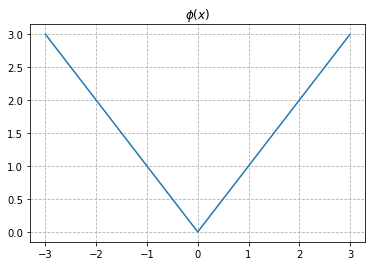

In [3]:
L, R = -3, 3
a, b = -3, 3
N = 1000
#N = int(input())
x = sorted([get_x(a, b) for i in range(N)])
y = get_y(x)
plt.plot(x, y)
plt.title("$\phi(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 2. Вариационный ряд и эмпирическая функция распределения

In [4]:
unique, counts = np.unique(y, return_counts=True)
Y = dict(zip(unique, counts))
Y

{0.0001908139932078612: 1,
 0.00885505117115537: 1,
 0.0159537668308527: 1,
 0.02272534427350248: 1,
 0.024070082459486386: 1,
 0.02499443859314976: 1,
 0.02516979319172785: 1,
 0.027026908230917357: 1,
 0.02769871423679504: 1,
 0.027823295743541365: 1,
 0.03295533371471393: 1,
 0.04599268546174784: 1,
 0.04794982000575487: 1,
 0.048419124891096565: 1,
 0.049403966199847105: 1,
 0.04974403990800358: 1,
 0.05133821252883486: 1,
 0.05157040189754092: 1,
 0.052485163505552546: 1,
 0.05307029539994268: 1,
 0.05386157268844283: 1,
 0.0673528178042817: 1,
 0.068708211704827: 1,
 0.07317510582089781: 1,
 0.07629557646283835: 1,
 0.07997841716585974: 1,
 0.08089676765821707: 1,
 0.08145710089793656: 1,
 0.08146359016601057: 1,
 0.08171364862940589: 1,
 0.09018570018751415: 1,
 0.09121376983531793: 1,
 0.09294126376653189: 1,
 0.09789280231414299: 1,
 0.09833010635880512: 1,
 0.1003935379074159: 1,
 0.10453243072270002: 1,
 0.11337613932921364: 1,
 0.1149028106060328: 1,
 0.11708410992065232: 1

In [5]:
def F_y_emp(X, x0):
    count = 0
    for i in X:
        if i <= x0:
            count += 1
    return count / len(X)

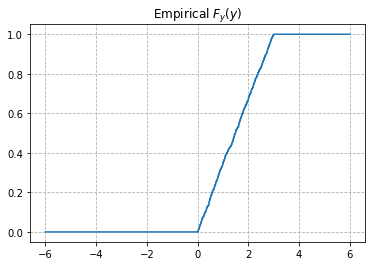

In [6]:
f_y_emp = [F_y_emp(Y, y) for y in Y.keys()]

interval_x = [2*a, list(Y.keys())[0]]
interval_y = [0, 0]
for i in range(len(list(Y.keys()))-1):
    interval_x.append(list(Y.keys())[i])
    interval_y.append(f_y_emp[i])
    interval_x.append(list(Y.keys())[i+1])
    interval_y.append(f_y_emp[i])
interval_x.append(list(Y.keys())[-1])
interval_y.append(1)
interval_x.append(2*b)
interval_y.append(1)
    
plt.plot(interval_x, interval_y)
plt.title("Empirical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 3. Теоритически находим функцию распределения

<img src="images/Lab1_3.jpg" width="450">

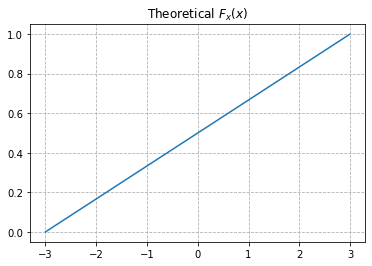

In [7]:
def F_x_ther(t):
    if t < -3:
        return 0
    elif t > 3:
        return 1
    else:
        return (t - a) / (b - a)  

plt.plot(x, [F_x_ther(x_0) for x_0 in x])
plt.title("Theoretical $F_x(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

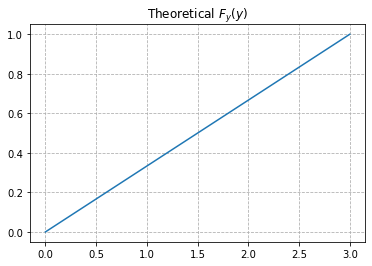

In [8]:
def F_y_ther(y):
    if y < 0:
        return 0
    else:
        return F_x_ther(y) - F_x_ther(-y)

f_y_ther = [F_y_ther(y0) for y0 in list(Y.keys())]
plt.plot(list(Y.keys()), f_y_ther)
plt.title("Theoretical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### Сравниваем теоритческую и эмпирическую

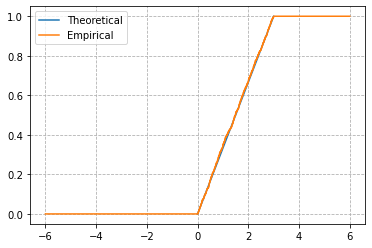

In [9]:
fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_ther, label="Theoretical")
ax.plot(interval_x, interval_y, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()

# lab2

<img src="images/assignment2.jpg" width="700">

## Задание 2

### 1. Гистрограмма равноинтервальным методом, полигон расределения и эмпирическая функция распредеделения

In [37]:
X = list(Y.keys())

In [38]:
if N > 100:
    M = int(4 * np.log10(N))
else:
    M = int(np.sqrt(N))

In [39]:
h = (X[-1] - X[0]) / M
A_i = [X[0] + i * h for i in range(M+1)]

In [40]:
a = A_i[:-1]
b = A_i[1:]
intervals = list(zip(a, b))
print("intervals")
intervals

intervals


[(0.0001908139932078612, 0.2500632433979072),
 (0.2500632433979072, 0.4999356728026066),
 (0.4999356728026066, 0.749808102207306),
 (0.749808102207306, 0.9996805316120053),
 (0.9996805316120053, 1.2495529610167047),
 (1.2495529610167047, 1.499425390421404),
 (1.499425390421404, 1.7492978198261033),
 (1.7492978198261033, 1.9991702492308028),
 (1.9991702492308028, 2.2490426786355022),
 (2.2490426786355022, 2.4989151080402014),
 (2.4989151080402014, 2.7487875374449007),
 (2.7487875374449007, 2.9986599668496003)]

In [41]:
m_i = np.zeros(len(intervals))
current_interval = 0
for value in X:
    if intervals[current_interval][0] < value and value < intervals[current_interval][1]:
        m_i[current_interval] += 1
        continue
    if intervals[current_interval][0] == value or value == intervals[current_interval][1]:
        m_i[current_interval] += 0.5
        continue
    current_interval += 1
m_i[0] += 0.5
m_i[-1] += 0.5
print("m_i")
m_i

m_i


array([82., 88., 86., 89., 75., 82., 86., 73., 90., 72., 82., 84.])

In [42]:
av_density = [round(value / len(X), 4) / h for value in m_i]
av_density

[0.32816745807193815,
 0.35217971110159213,
 0.3441756267583741,
 0.3561817532732011,
 0.3001531628706751,
 0.32816745807193815,
 0.3441756267583741,
 0.2921490785274571,
 0.3601837954448101,
 0.2881470363558481,
 0.32816745807193815,
 0.3361715424151562]

In [43]:
interval_x = [intervals[0][0]]
interval_y = [0]
for i in range(len(intervals)):
    interval_x.append(intervals[i][0])
    interval_y.append(av_density[i])
    interval_x.append(intervals[i][1])
    interval_y.append(av_density[i])
interval_x.append(intervals[-1][1])
interval_y.append(0)

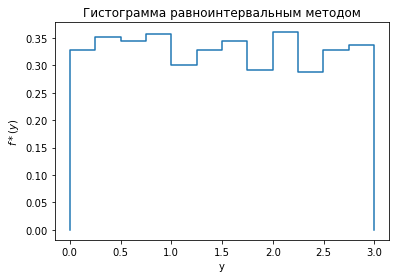

In [44]:
plt.plot(interval_x, interval_y)
plt.title("Гистограмма равноинтервальным методом")
plt.xlabel("y")
plt.ylabel("$f*(y)$")
plt.show()

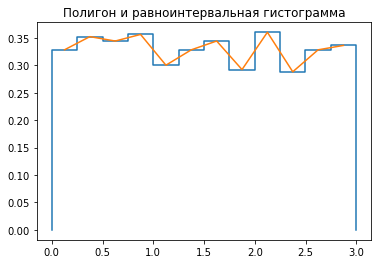

In [45]:
polygon_x = [(intervals[i][0] + intervals[i][1]) / 2 for i in range(len(intervals))]

plt.plot(interval_x, interval_y)
plt.plot(polygon_x, av_density)
plt.title("Полигон и равноинтервальная гистограмма")
plt.show()

In [46]:
empiric_func = []
sum = 0
for i in m_i:
    empiric_func.append(round(sum / N, 5))
    sum += i
empiric_func.append(1)
print(f'empirical function: {empiric_func}')

empirical function: [0.0, 0.082, 0.17, 0.256, 0.345, 0.42, 0.502, 0.588, 0.661, 0.751, 0.823, 0.905, 1]


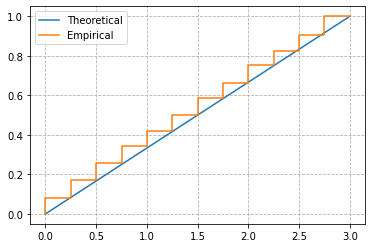

In [47]:
interval_x_F = [intervals[0][0]]
interval_y_F = [0]
for i in range(len(intervals)):
    interval_x_F.append(intervals[i][0])
    interval_y_F.append(empiric_func[i+1])
    interval_x_F.append(intervals[i][1])
    interval_y_F.append(empiric_func[i+1])

fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_ther, label="Theoretical")
ax.plot(interval_x_F, interval_y_F, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()

In [21]:
pd.DataFrame(
    {
        'interval': intervals,
        'm_i': m_i,
        'h_i': h,
        'density': av_density
    }
)

,interval,m_i,h_i,density
0,"(0.0001908139932078612, 0.2500632433979072)",82.0,0.249872,0.328167
1,"(0.2500632433979072, 0.4999356728026066)",88.0,0.249872,0.352180
2,"(0.4999356728026066, 0.749808102207306)",86.0,0.249872,0.344176
3,"(0.749808102207306, 0.9996805316120053)",89.0,0.249872,0.356182
4,"(0.9996805316120053, 1.2495529610167047)",75.0,0.249872,0.300153
5,"(1.2495529610167047, 1.499425390421404)",82.0,0.249872,0.328167
6,"(1.499425390421404, 1.7492978198261033)",86.0,0.249872,0.344176
7,"(1.7492978198261033, 1.9991702492308028)",73.0,0.249872,0.292149
8,"(1.9991702492308028, 2.2490426786355022)",90.0,0.249872,0.360184
9,"(2.2490426786355022, 2.4989151080402014)",72.0,0.249872,0.288147


### 2. Теоритическая плотность распределения

<img src="images/Lab2_2.jpg" width="500">

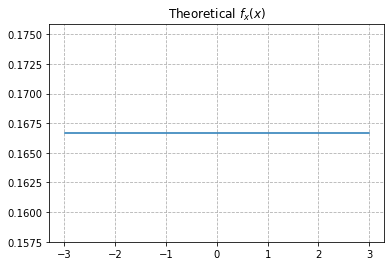

In [48]:
def F_x_ther(t):
    if abs(t) > 3:
        return 0
    else:
        return 1 / (R - L)  

plt.plot(x, [F_x_ther(x_0) for x_0 in x])
plt.title("Theoretical $f_x(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

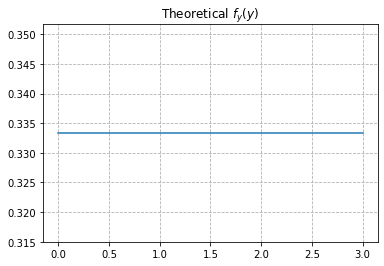

In [49]:
def F_y_ther(y):
    if y < 0:
        return 0
    else:
        return F_x_ther(y) + F_x_ther(-y)

f_y_theoretical = [F_y_ther(y0) for y0 in list(Y.keys())]
plt.plot(list(Y.keys()), f_y_theoretical)
plt.title("Theoretical $f_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### Сравниваем теоритческую и эмпирическую

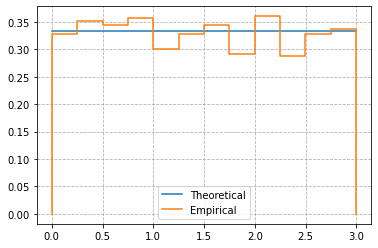

In [50]:
fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_theoretical, label="Theoretical")
ax.plot(interval_x, interval_y, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()

## Задание 3

### 1. Гистрограмма равновероятностным методом, полигон расределения и эмпирическая функция распредеделения

In [25]:
m = N // M

In [26]:
A = np.zeros(M)
B = np.zeros(M)
A[0] = X[0]
for i in range(1, M):
    B[i-1] = A[i] = (X[i*m] + X[i*m + 1]) / 2
B[-1] = X[-1]

In [27]:
intervals = list(zip(A, B))
intervals

[(0.0001908139932078612, 0.2545541526802857),
 (0.2545541526802857, 0.48997361412074625),
 (0.48997361412074625, 0.7215938587349728),
 (0.7215938587349728, 0.9709074853000386),
 (0.9709074853000386, 1.2157302664972742),
 (1.2157302664972742, 1.491805200990611),
 (1.491805200990611, 1.7213173168648872),
 (1.7213173168648872, 1.9869200603500552),
 (1.9869200603500552, 2.2150663308709966),
 (2.2150663308709966, 2.496764850341032),
 (2.496764850341032, 2.7475871641362697),
 (2.7475871641362697, 2.9986599668496003)]

In [28]:
h_i = [interval[1] - interval[0] for interval in intervals]
h_i

[0.25436333868707783,
 0.23541946144046055,
 0.2316202446142266,
 0.24931362656506573,
 0.24482278119723566,
 0.27607493449333687,
 0.2295121158742761,
 0.265602743485168,
 0.22814627052094139,
 0.28169851947003544,
 0.2508223137952377,
 0.25107280271333066]

In [29]:
f_i = [m/h_i[i]/N for i in range(M)]
f_i

[0.32630488508451305,
 0.35256218620222846,
 0.35834518756441197,
 0.33291401333949433,
 0.3390207381605269,
 0.3006430125658627,
 0.36163668172300917,
 0.3124967720999273,
 0.36380169533554346,
 0.2946412361561197,
 0.33091154747802154,
 0.33058140548487663]

In [30]:
interval_x = [intervals[0][0]]
interval_y = [0]
for i in range(len(intervals)):
    interval_x.append(intervals[i][0])
    interval_y.append(f_i[i])
    interval_x.append(intervals[i][1])
    interval_y.append(f_i[i])
interval_x.append(intervals[-1][1])
interval_y.append(0)

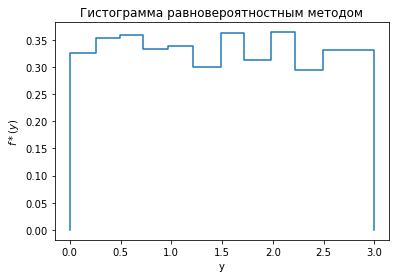

In [31]:
plt.plot(interval_x, interval_y)
plt.title("Гистограмма равновероятностным методом")
plt.xlabel("y")
plt.ylabel("$f*(y)$")
plt.show()

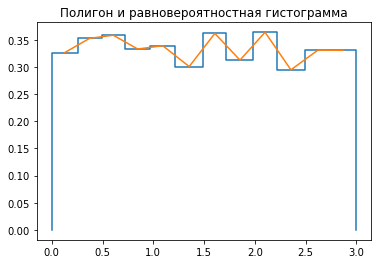

In [32]:
polygon_x = [(intervals[i][0] + intervals[i][1]) / 2 for i in range(len(intervals))]

plt.plot(interval_x, interval_y)
plt.plot(polygon_x, f_i)
plt.title("Полигон и равновероятностная гистограмма")
plt.show()

In [33]:
empiric_func = []
sum = 0
for i in f_i:
    empiric_func.append(round(sum/max(X), 5))
    sum += i
empiric_func.append(1)
print(f'empirical function: {empiric_func}')

empirical function: [0.0, 0.10882, 0.22639, 0.34589, 0.45691, 0.56997, 0.67023, 0.79083, 0.89504, 1.01636, 1.11462, 1.22497, 1]


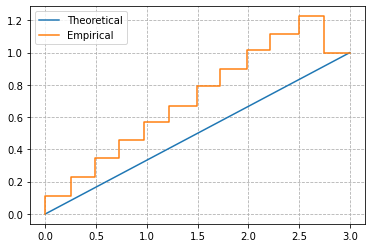

In [34]:
interval_x_F = [intervals[0][0]]
interval_y_F = [0]
for i in range(len(intervals)):
    interval_x_F.append(intervals[i][0])
    interval_y_F.append(empiric_func[i+1])
    interval_x_F.append(intervals[i][1])
    interval_y_F.append(empiric_func[i+1])

fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_ther, label="Theoretical")
ax.plot(interval_x_F, interval_y_F, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()

In [35]:
pd.DataFrame(
    {
        'interval': intervals,
        'm_i': m,
        'h_i': h_i,
        'f_i': f_i
    }
)

,interval,m_i,h_i,f_i
0,"(0.0001908139932078612, 0.2545541526802857)",83,0.254363,0.326305
1,"(0.2545541526802857, 0.48997361412074625)",83,0.235419,0.352562
2,"(0.48997361412074625, 0.7215938587349728)",83,0.231620,0.358345
3,"(0.7215938587349728, 0.9709074853000386)",83,0.249314,0.332914
4,"(0.9709074853000386, 1.2157302664972742)",83,0.244823,0.339021
5,"(1.2157302664972742, 1.491805200990611)",83,0.276075,0.300643
6,"(1.491805200990611, 1.7213173168648872)",83,0.229512,0.361637
7,"(1.7213173168648872, 1.9869200603500552)",83,0.265603,0.312497
8,"(1.9869200603500552, 2.2150663308709966)",83,0.228146,0.363802
9,"(2.2150663308709966, 2.496764850341032)",83,0.281699,0.294641


### 2. Сравнить полученные результаты

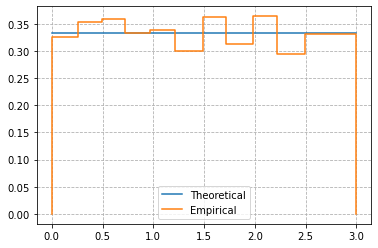

In [36]:
fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_theoretical, label="Theoretical")
ax.plot(interval_x, interval_y, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()